### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Lista con todos los DataFrame
tiendas = [tienda1, tienda2, tienda3, tienda4]

# Sumar la columna "ventas" en cada uno
totales = [float(df["Precio"].sum()) for df in tiendas]

i = 1
for numero in totales:
    print(f"En la tienda {i} las ventas fueron de: " + "{:,}".format(numero))
    i += 1


En la tienda 1 las ventas fueron de: 1,150,880,400.0
En la tienda 2 las ventas fueron de: 1,116,343,500.0
En la tienda 3 las ventas fueron de: 1,098,019,600.0
En la tienda 4 las ventas fueron de: 1,038,375,700.0


# 2. Ventas por categoría

In [ ]:
# Contar apariciones de productos por categoría
cat_tienda1 = tienda1["Categoría del Producto"].value_counts()
cat_tienda2 = tienda2["Categoría del Producto"].value_counts()
cat_tienda3 = tienda3["Categoría del Producto"].value_counts()
cat_tienda4 = tienda4["Categoría del Producto"].value_counts()

tabla = pd.DataFrame({
    "Tienda 1": cat_tienda1,
    "Tienda 2": cat_tienda2,
    "Tienda 3": cat_tienda3,
    "Tienda 4": cat_tienda4
})

print(tabla)

                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


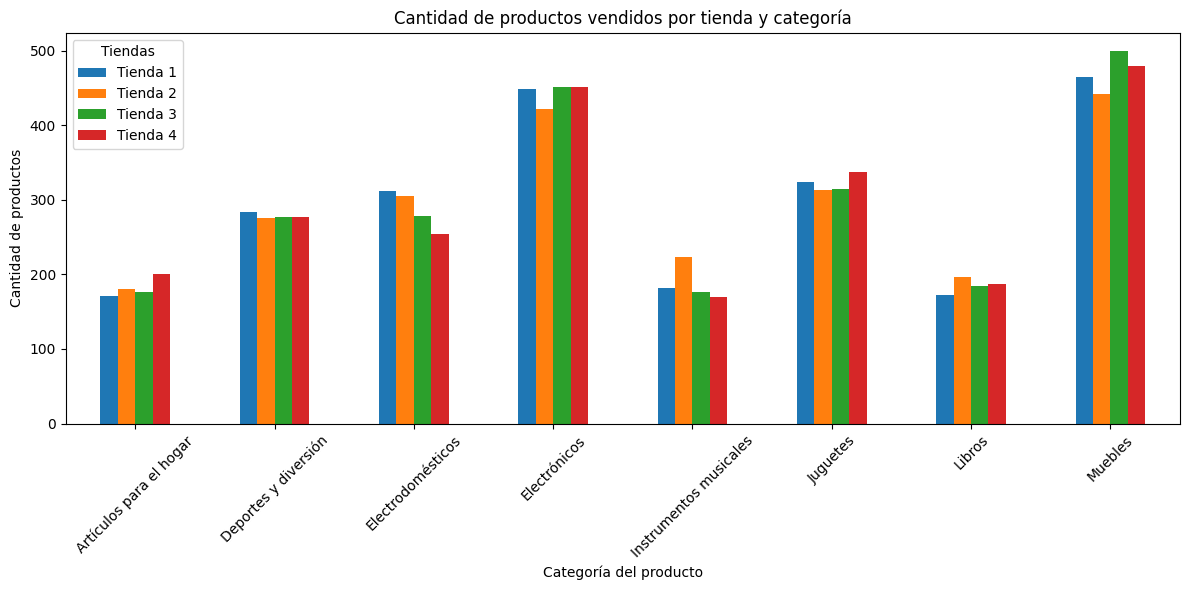

In [ ]:
import matplotlib.pyplot as plt
# 'Tabla' tiene como índice las categorías
tabla[["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]].plot(kind='bar', figsize=(12, 6))

plt.title("Cantidad de productos vendidos por tienda y categoría")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad de productos")
plt.xticks(rotation=45)
plt.legend(title="Tiendas")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


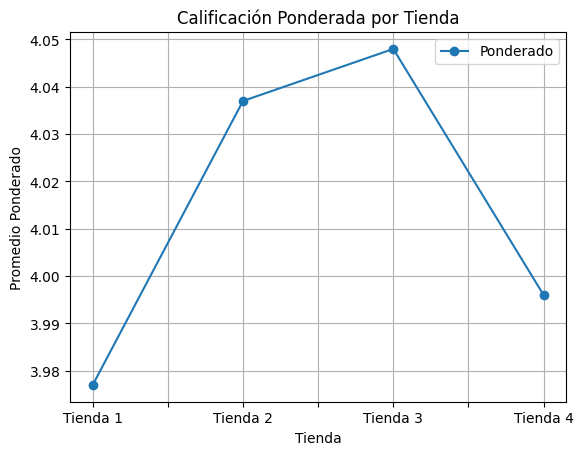

In [ ]:
import matplotlib.pyplot as plt
# Contar calificaciones de clientes
cal_tienda1 = tienda1["Calificación"]
cal_tienda2 = tienda2["Calificación"]
cal_tienda3 = tienda3["Calificación"]
cal_tienda4 = tienda4["Calificación"]

cal_tiendas = {
    "Tienda 1": cal_tienda1,
    "Tienda 2": cal_tienda2,
    "Tienda 3": cal_tienda3,
    "Tienda 4": cal_tienda4
    }

ponderados = {}

for nombre, df in cal_tiendas.items():
    promedio = round(float(df.mean()),3)
    ponderados[nombre] = promedio

df_ponderado = pd.DataFrame.from_dict(ponderados, orient="index", columns=["Ponderado"])

df_ponderado.plot(kind="line", marker="o", title="Calificación Ponderada por Tienda")
plt.ylabel("Promedio Ponderado")
plt.xlabel("Tienda")
plt.grid(True)
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
cat_prd_unicos = df_total[['Producto', 'Categoría del Producto']].drop_duplicates()

prd_tienda1 = tienda1["Producto"].value_counts()
prd_tienda2 = tienda2["Producto"].value_counts()
prd_tienda3 = tienda3["Producto"].value_counts()
prd_tienda4 = tienda4["Producto"].value_counts()

ventas = pd.DataFrame({
    "Tienda 1": prd_tienda1,
    "Tienda 2": prd_tienda2,
    "Tienda 3": prd_tienda3,
    "Tienda 4": prd_tienda4
})

df_final = cat_prd_unicos.merge(ventas, on='Producto', how='left')

df_final.head()


,Producto,Categoría del Producto,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Asistente virtual,Electrónicos,40,38,39,50
1,Mesa de comedor,Muebles,40,34,56,55
2,Juego de mesa,Juguetes,43,32,52,48
3,Microondas,Electrodomésticos,60,62,36,48
4,Silla de oficina,Muebles,46,49,46,40


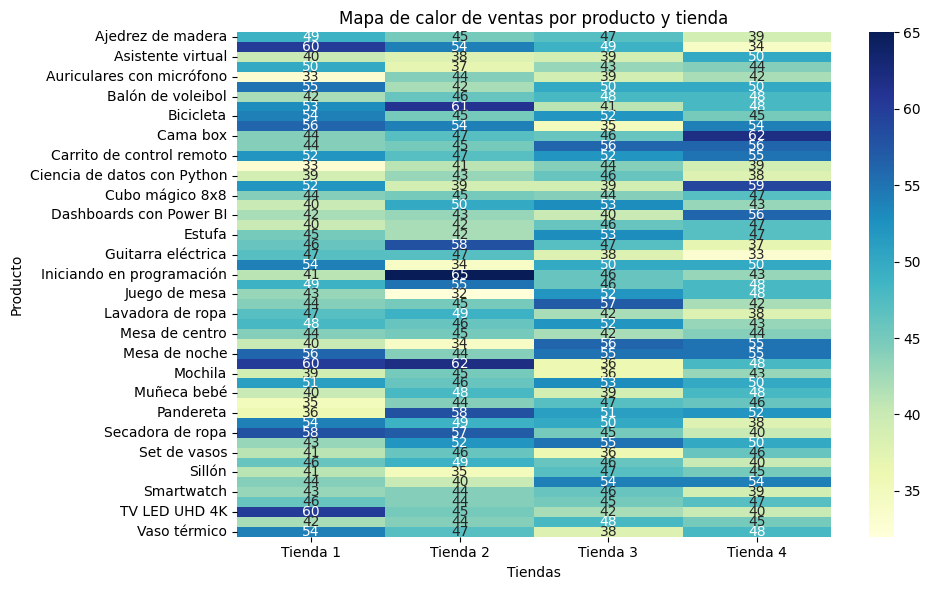

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(ventas, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de calor de ventas por producto y tienda')
plt.xlabel('Tiendas')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
# Costo promedio de envio por tienda
cost_tienda1 = tienda1["Costo de envío"]
cost_tienda2 = tienda2["Costo de envío"]
cost_tienda3 = tienda3["Costo de envío"]
cost_tienda4 = tienda4["Costo de envío"]

cost_tiendas = {
    "Tienda 1": cost_tienda1,
    "Tienda 2": cost_tienda2,
    "Tienda 3": cost_tienda3,
    "Tienda 4": cost_tienda4
    }

ponderados = {}

for nombre, df in cost_tiendas.items():
    promedio = round(float(df.mean()),3)
    ponderados[nombre] = promedio

df_ponderado = pd.DataFrame.from_dict(ponderados, orient="index", columns=["Ponderado"])

df_ponderado.head()

,Ponderado
Tienda 1,26018.610
Tienda 2,25216.236
Tienda 3,24805.680
Tienda 4,23459.457


<Figure size 800x500 with 0 Axes>

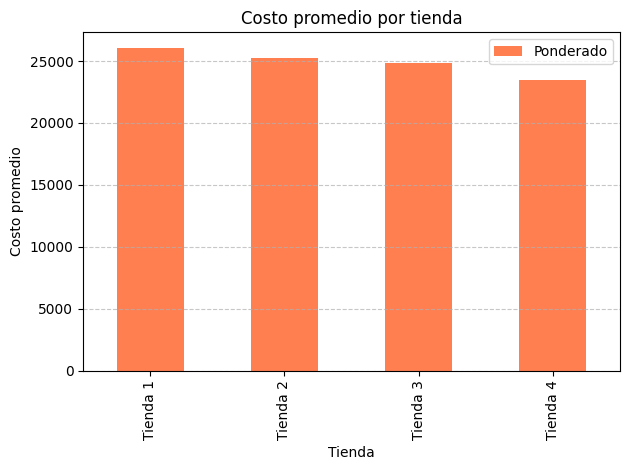

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_ponderado.plot(kind='bar', color='coral')

plt.title('Costo promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

